# Punto 3 MCMC

$f(x) = (\cfrac{x^{c-1}}{\gamma(c) \cdot b^c})^{\cfrac{-x}{b}}$

In [99]:
#Zona de importaciones
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as ss
from scipy.stats import gamma
# %matplotlib inline
# plt.rcParams['figure.figsize'] = (17.0, 4.0)

In [195]:
#Definimos la función
def gammaprop(x,b,c):
    return ((x**(c-1))/(ss.gamma(c)*(b**c)))**(-x/b)

In [196]:
#Función para dar chance a el estado escogido
def random_coin(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False 
    else:
        return True

In [214]:
#Calculamos la función por medio de MCMC, utilizamos dos estados (actual y siguiente), 
def gammaprop_mcmc(N,b,c):
    states = []
    cur = random.uniform(0,20)
    for i in range(0, N):
        states.append(cur)
        next = random.uniform(0,20)
        ap = min(gammaprop(next,b,c)/gammaprop(cur,b,c), 1)
        if random_coin(ap):
            cur = next
    return states[-1000:] 

In [254]:
#Gráficamos la función generada por MCMC vs la original
def plot_gprop(b,c):
    Ly = []
    Lx = []
    i_list = np.mgrid[1:20:100j]
    for i in i_list:
        Lx.append(i)
        Ly.append(gammaprop(i,b,c))
        
        
    plt.plot(Lx, Ly, 'r-',label="Real Distribution: b="+str(b)+", c="+str(c))
    plt.legend()
    plt.show()

    plt.hist(gammaprop_mcmc(100,b,c), density=True,bins =25, histtype='step',label="Simulated_MCMC: b="+str(b)+", c="+str(c))
    plt.legend()
    plt.show()
  


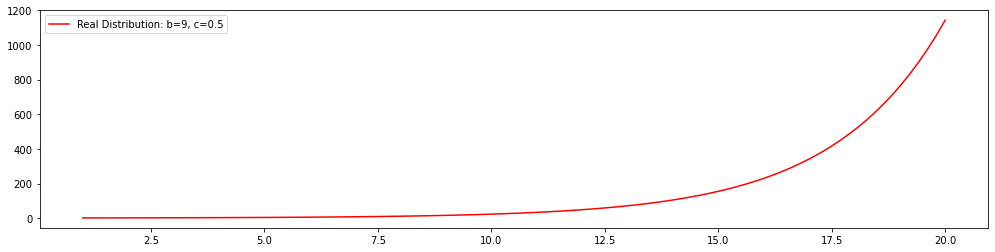

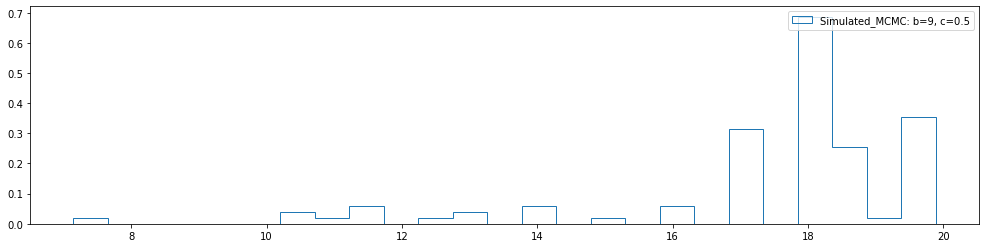

In [255]:
plot_gprop(9,0.5)